# The Basics of Applied Numerical Methods Using Python - 3

## Overflow and Underflow
- A single subtraction may kill most of the significant digits. This is very '**loss of significance**', which is often called '*catastrophic cancellation*'. In order to prevent 'loss of significance', it is important to avoid a '*bad subtraction*' -- that is, a subtraction of a number from another number having almost equal value.  
- In order to decrease the magnitude of round-off errors and to lower the possibility of overflow / underflow errors, make the intermediate result as cloase to **`1`** as possible in consecutive multiplication / division processes. According to this rule, when computing $xy/z$, we program the formula as  
 - $\frac{\big(xy\big)}{z}$ when $x$ and $y$ in the multiplication are very different in magnitude,  
 - $x\big(\frac{y}{z}\big)$ when $y$ and $z$ in the division are close in magnitude, and  
 - $\big(\frac{x}{z}\big)y$ when $x$ and $z$ in the division are close in magnitude.

**Practice, practice, and more practices ...**
- 1D Brownian motion

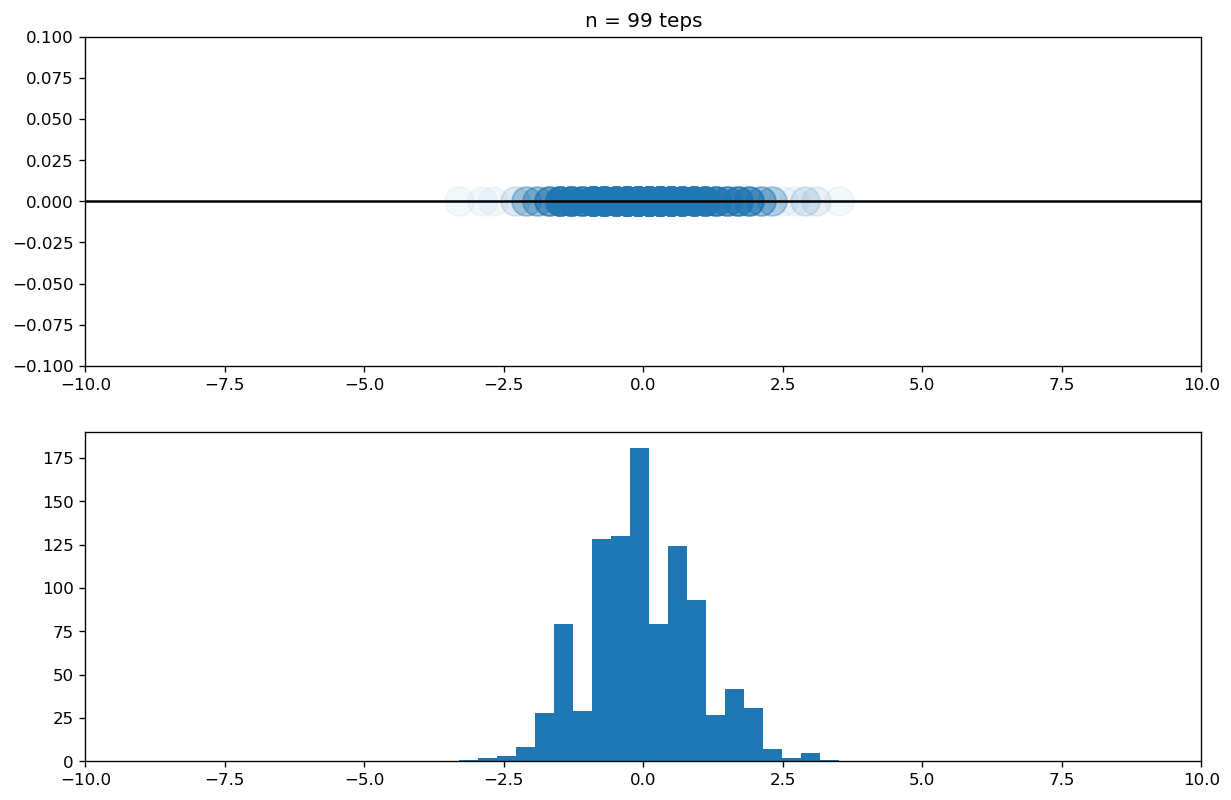

In [1]:
# 1D Brownian motion
import numpy as np
import pylab as pl
from IPython import display

N = 1000
x = np.zeros(N)
y = np.zeros(len(x))
xaxis = np.linspace(-10, 10,  20)
yaxis = np.zeros(len(xaxis))
dx = 0.1
fig = pl.figure(figsize=(12,8), dpi=120)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

nsteps = 100
for n in range(nsteps):
    ax1.cla()
    ax1.plot(xaxis, yaxis, 'k-')
    ax1.scatter(x, y, s = 300, alpha=0.05);
    ax1.set_xlim(np.min(xaxis), np.max(xaxis))
    ax1.set_ylim(-0.1, 0.1)
    ax1.set_title('n = {} teps'.format(n))
    
    ax2.cla()
    ax2.hist(x, bins=20)
    ax2.set_xlim(np.min(xaxis), np.max(xaxis))
    
    _ = display.clear_output(wait=True)
    _ = display.display(fig)
    
    # update location
    '''
    for i in range(N):
        if np.random.rand(1) > 0.5:
            x[i] += dx
        else:
            x[i] -= dx
    '''

    x += dx * np.sign(np.random.rand(N) - 0.5)

pl.close()

- 2D Brownian motion

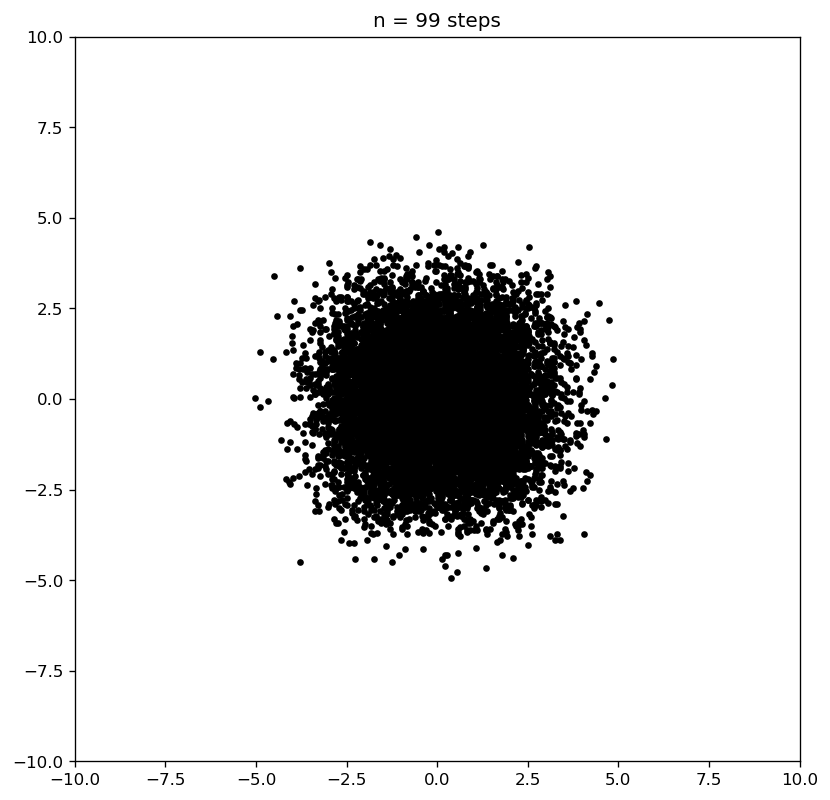

In [2]:
# 2D Brownian motion

N = 101
X, Y = np.meshgrid(np.linspace(-2, 2, N), np.linspace(-2, 2, N))
dx = .1
dy = .1

fig = pl.figure(figsize=(12,8), dpi=120)
ax = fig.subplots()
nsteps = 100;
for n in range(nsteps):
    ax.cla()
    ax.plot(X, Y, 'k.')
    ax.axis('square')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_title('n = {} steps'.format(n))
    _ = display.clear_output(wait=True)
    _ = display.display(fig)
    '''
    for j in range(N):
        for i in range(N):
            if np.random.rand(1) > 0.5:
                X[i][j] += dx
            else:
                X[i][j] -= dx
            
            if np.random.rand(1) > 0.5:
                Y[i][j] += dy
            else:
                Y[i][j] -= dy
    '''
    
    X += dx * np.sign(np.random.rand(np.size(X,0), np.size(X,1)) - 0.5);
    Y += dy * np.sign(np.random.rand(np.size(Y,0), np.size(Y,1)) - 0.5);

pl.close()

## Systems of Linear Algebraic Equations
- Solve the simultaneous equations $\mathbf{Ax=b}$

$$\begin{align}
A_{11}x_1+A_{12}x_2+\dots+A_{1n}x_n&=b_1\\
A_{21}x_1+A_{22}x_2+\dots+A_{2n}x_n&=b_2\\
A_{31}x_1+A_{32}x_2+\dots+A_{3n}x_n&=b_3\\
 &\quad \vdots\\
A_{n1}x_1+A_{n2}x_2+\dots+A_{nn}x_n&=b_n\\
\end{align}$$  
<br/>
$$
\begin{bmatrix}
A_{11} & A_{12} & \dots & A_{1n} \\
A_{21} & A_{22} & \dots & A_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
A_{n1} & A_{n2} & \dots & A_{nn} \\
\end{bmatrix}
\begin{bmatrix}
x1\\x2\\\vdots\\x_n
\end{bmatrix}
=\begin{bmatrix}
b_1\\b_2\\\vdots\\b_n
\end{bmatrix}
$$

$$\mathbf{Ax}=\mathbf{b}$$
<br/>
$$
\big[\mathbf{A}|\mathbf{b}\big]=\begin{bmatrix}
\begin{array}{cccc|c}
A_{11} & A_{12} & \dots & A_{1n} & b_1\\
A_{21} & A_{22} & \dots & A_{2n} & b_2\\
\vdots & \vdots & \ddots & \vdots& \vdots \\
A_{n1} & A_{n2} & \dots & A_{nn} & b_n\\
\end{array} \end{bmatrix}
$$

- Uniqueness of Solution
 - $\left\{\begin{align}
     &2x+y=3\\
     &4x+2y=6
   \end{align}\right ., \quad$ 
   $\left\{\begin{align}
     &2x+y=3\\
     &4x+2y=0
   \end{align}\right .$
- Conditioning
 - coefficient (determinant) of the matrix
   - $|\mathbf{A}|$
 - norm of the matrix
   - $\|\mathbf{A}\|$
 - condition of the matrix
   - $cond(A)=\|\mathbf{A}\|\|\mathbf{A}^{-1}\|$
 - when condition number is big, the matrix is **ill-conditioned**
 - e.g.<br/>
   $\left\{\begin{align}
     &2x+y=3\\
     &2x+1.001y=0
   \end{align}\right .$
   
   $|\mathbf{A}|=\left|\begin{matrix}
   2 & 1 \\ 2 & 1.001
   \end{matrix}\right|=2\times1.001-2\times1=0.002$

In [4]:
import numpy as np

A = np.array([[2, 1], [2, 1.001]])
A_inv = np.linalg.inv(A)
A_norm = np.linalg.norm(A)
A_inv_norm = np.linalg.norm(A_inv)
A_cond = np.linalg.cond(A)

A_cond - A_norm * A_inv_norm

5001.000300039825

In [5]:
np.linalg.det(A)

0.0019999999999997806

### Direct Methods

| Method | Initial Form | Final Form |
|:------:|:------------:|:----------:|
| Gauss Elimination | $\mathbf{Ax}=\mathbf{b}$ | $\mathbf{Ux}=\mathbf{c}$ |
| LU Decomposition | $\mathbf{Ax}=\mathbf{b}$ | $\mathbf{LUx}=\mathbf{b}$ |
| Gauss-Jordan Elimination | $\mathbf{Ax}=\mathbf{b}$ | $\mathbf{Ix}=\mathbf{c}$ |

$$\mathbf{U}=\begin{bmatrix}
U_{11} & U_{12} & U_{13} & \dots & U_{1n}\\
     0 & U_{22} & U_{23} & \dots & U_{2n}\\
     0 &      0 & U_{33} & \dots & U_{3n}\\
\vdots & \vdots & \vdots & \ddots& \vdots\\
     0 &      0 &     0  & \dots & U_{nn}\\
\end{bmatrix}, \quad 
\mathbf{L}=\begin{bmatrix}
L_{11} &     0  &     0  & \dots &     0 \\
L_{21} & L_{22} &     0  & \dots &     0 \\
L_{31} & L_{32} & L_{33} & \dots &     0 \\
\vdots & \vdots & \vdots & \ddots&     0 \\
L_{n1} & L_{n2} & L_{n3} & \dots & L_{nn}\\
\end{bmatrix}$$

$$\begin{aligned}
L_{11}x_1 &= c_1\\
L_{21}x_1+L_{22}x_2 &= c_2\\
L_{31}x_1+L_{32}x_2+L_{33}x_3 &= c_3\\
&\quad \vdots \\
L_{n1}x_1+L_{n2}x_2+L_{n3}x_3+\dots+L_{nn}x_n &= c_n
\end{aligned}$$

$$\big\Downarrow$$

$$\begin{aligned}
x_1 &= c_1/L_{11}\\
x_2 &= \left(c_2-L_{21}x_1\right)/L_{22}\\
x_3 &= \left(c_3-L_{31}x_1-L_{32}x_2\right)/L_{33}\\
    &\quad \vdots\\
x_n &= \left(c_n-L_{n1}x_1-L_{n2}x_2-L_{n3}x_3-\dots-L_{n,n-1}x_{n-1}\right)/L_{nn} \\
\end{aligned}$$

<br/>

$$\begin{gather}
\mathbf{LUx}=\mathbf{b}\\
\text{let }\mathbf{y}=\mathbf{Ux},\\
\text{then solve }\mathbf{Ly}=\mathbf{b} \text{ for }\mathbf{y},\\
\text{and finally solve }\mathbf{Ux}=\mathbf{y} \text{ for }\mathbf{x}.
\end{gather}$$  

<br/>

- Examples

$$\mathbf{A}=\begin{bmatrix}
2.1 & -0.6 &  1.1\\
3.2 &  4.7 & -0.8\\
3.1 & -6.5 &  4.1
\end{bmatrix}$$

$$|\mathbf{A}|=2.1\left|\begin{matrix}
4.7  & -0.8\\
-6.5 &  4.1
\end{matrix}\right|
+0.6\left|\begin{matrix}
3.2 & -0.8\\
3.1 &  4.1 
\end{matrix}\right|
-1.1\left|\begin{matrix}
3.2 &  4.7\\
3.1 & -6.5
\end{matrix}\right|=2.1\times14.07+0.6\times15.60+1.1\times35.37=0
$$

In [6]:
import numpy

A = np.array([[2.1, -0.6, 1.1], [3.2, 4.7, -0.8], [3.1, -6.5, 4.1]])
np.linalg.det(A)

0.0

$$
\mathbf{A}=\begin{bmatrix}
 8 & -6 &  2\\
-4 & 11 & -7\\
 4 & -7 &  6
\end{bmatrix},\ 
\mathbf{b}=\begin{bmatrix}
28 \\ -40 \\ 33
\end{bmatrix}
$$

$$
\mathbf{A}=\mathbf{LU}=
\begin{bmatrix}
 2 &  0 & 0\\
-1 &  2 & 0\\
 1 & -1 & 1
\end{bmatrix}
\begin{bmatrix}
4 & -3 &  1\\
0 &  4 & -3\\
0 &  0 &  2
\end{bmatrix}
$$

In [7]:
from scipy import linalg

A = np.array([[8,-6,2], [-4,11,-7], [4,-7,6]])
p,l,u = linalg.lu(A)
print('l =', l)
print('u =', u)

l = [[ 1.   0.   0. ]
 [-0.5  1.   0. ]
 [ 0.5 -0.5  1. ]]
u = [[ 8. -6.  2.]
 [ 0.  8. -6.]
 [ 0.  0.  2.]]


Solve $\mathbf{Ly}=\mathbf{b}$ for $\mathbf{y}$:

$$
\begin{aligned}
2y_1&=28\\
-y_1+2y_2&=-40\\
y_1-y_2+y_3&=33
\end{aligned}\quad
\begin{aligned}
y_1&=28/2=14\\
y_2&=(-40+y_1)/2=(-40+14)/2=-13\\
y_3&=33-y_1+y_2=33-14-13=6
\end{aligned}
$$

Solve $\mathbf{Ux}=\mathbf{y}$ for $\mathbf{x}$, inversely:

$$
\begin{aligned}
2x_3&=y_3\\
4x_2-3x_3&=y_2\\
4x_1-3x_2+x_3&=y_1
\end{aligned}\quad
\begin{aligned}
x_3&=y_3/2=6/2=3\\
x_2&=(y_2+3x_3)/4=(-13+3\times3)/4=-1\\
x_1&=(y_1+3x_2-x_3)/4=[14+3\times(-1)-3]/4=2
\end{aligned}
$$

#### Gauss Elimination Method

$
\begin{align}
4x_1-2x_2+x_3&=11\quad &(a)\\
-2x_1+4x_2-2x_3&=-16\quad &(b)\\
x_1-2x_2+4x_3&=17\quad &(c)
\end{align}\quad\quad\quad
\begin{bmatrix} \begin{array}{ccc|c}
4 & -2 & 1 & 11\\
-2 & 4 & -2 & -16\\
1 & -2 & 4 & 17
\end{array} \end{bmatrix}
$

$
\begin{align}
\text{Eq. (b)} &\leftarrow \text{Eq. (b)}-(-0.5)\times\text{Eq. (a)}\\
\text{Eq. (c)} &\leftarrow \text{Eq. (c)}-0.25\times\text{Eq. (a)}
\end{align}
$

$
\begin{align}
4x_1-2x_2+x_3&=11.0\quad &(a)\\
3x_2-1.5x_3&=-10.5\quad &(b)\\
-1.5x_2+3.75x_3&=14.25\quad &(c)
\end{align}\quad\quad\quad
\begin{bmatrix}\begin{array}{ccc|c}
4 & -2 & 1 & 11.0\\
0 &  3 & -1.5 & -10.50\\
0 & -1.5 & 3.75 & 14.25
\end{array}\end{bmatrix}
$

$\text{Eq. (c)} \leftarrow \text{Eq. (c)}-(-0.5)\times\text{Eq. (b)}$

$
\begin{align}
4x_1-2x_2+x_3&=11.0\quad &(a)\\
3x_2-1.5x_3&=-10.5\quad &(b)\\
3x_3&=9.0\quad &(c)
\end{align}\quad\quad\quad
\begin{bmatrix}\begin{array}{ccc|c}
4 & -2 & 1 & 11.0\\
0 &  3 & -1.5 & -10.50\\
0 &  0 & 3 & 9.0
\end{array}\end{bmatrix}
$

$\begin{align}
x_3&=9/3=3\\
x_2&=(-10.5+1.5x_3)/3=(-10.5+1.5\times3)/3=-2\\
x_1&=(11+2x_2-x_3)/4=[11+2\times(-2)-3]/4=1
\end{align}$

In [8]:
from scipy import linalg

A = np.array([[4,-2,1], [-2,4,-2], [1,-2,4]])
b = np.array([11, -16, 17])
linalg.solve(A, b)

array([ 1., -2.,  3.])

#### Gauss Elimination Method:
- Elimination Phase

$$
\begin{bmatrix}\begin{array}{ccccccccc|c}
A_{11} & A_{12} & A_{13} & \dots & A_{1k} & \dots & A_{1j} & \dots & A_{1n} & b_1\\
    0  & A_{22} & A_{23} & \dots & A_{2k} & \dots & A_{2j} & \dots & A_{2n} & b_2\\
    0  &     0  & A_{33} & \dots & A_{3k} & \dots & A_{3j} & \dots & A_{3n} & b_3\\
\vdots & \vdots & \vdots & & \vdots & & \vdots & & \vdots & \vdots\\
0 & 0 & 0 & \dots & A_{kk} & \dots & A_{kj} & \dots & A_{kn} & b_k\\
\hline
\vdots & \vdots & \vdots & & \vdots & & \vdots & & \vdots & \vdots\\
0 & 0 & 0 & \dots & A_{ik} & \dots & A_{ij} & \dots & A_{in} & b_i\\
\vdots & \vdots & \vdots & & \vdots & & \vdots & & \vdots & \vdots\\
0 & 0 & 0 & \dots & A_{nk} & \dots & A_{nj} & \dots & A_{nn} & b_n\\
\end{array}\end{bmatrix}
\begin{array}{l}
\\ \\ \\ \\
\leftarrow \text{pivot row}\\
\\
\leftarrow \text{row being}\\
\quad \text{transformed}\\ \\
\end{array}
$$

$$
\begin{align}
A_{ij} & \leftarrow A_{ij}-\lambda A_{kj},\quad j=k,k+1,\dots,n\\
b_i & \leftarrow b_i-\lambda b_k
\end{align}\quad\quad\quad
\lambda=A_{ik}/A_{kk}
$$

<br/>

```python
for k in range(n):
    for i in range(k+1,n):
        if A[i,k] != 0:
            lambda_ = A[i,k]/A[k,k]
            A[i,k+1:n] = A[i,k+1:n] - lambda_ * A[k,k+1:n]
            b[i] = b[i] - lambda_ * b[k]
```

<center>$~n^3/3$ steps, $O(n^3)$</center>

<br/>

- Back Substitution Phase

$$\left[\mathbf{A}|\mathbf{b}\right]=\begin{bmatrix}
\begin{array}{ccccc|c}
A_{11} & A_{12} & A_{13} & \dots & A_{1n} & b_1\\
    0  & A_{22} & A_{23} & \dots & A_{2n} & b_2\\
    0  &     0  & A_{33} & \dots & A_{3n} & b_3\\
\vdots & \vdots & \vdots &       & \vdots & \vdots\\
    0  &     0  &     0  & \dots & A_{nn} & b_n\\
\end{array}
\end{bmatrix}
$$

$$x_n=b_n/A_{nn}$$

$$A_{kk}x_{k}+A_{k,k+1}x_{k+1}+\dots+A_{kn}x_n=b_k$$

$$x_k=\left(b_k-\sum_{j=k+1}^{n}A_{kj}x_j\right)\frac{1}{A_{kk}},\quad k=n-1,n-2,\dots,1$$

<br/>

```python
b[-1] = b[-1] / A[-1,-1]
for k in range(n-2, -1, -1):
    b[k] = (b[k] - A[k,k+1:-1]*b[k+1:-1])/A[k,k]
```

<center>$~n^2/2$ steps, $O(n^2)$</center>

<br/>

- Code and Examples

An $n\times n$ Vandermode matrix $\mathbf{A}$ is defined by
$$A_{ij}=v_{i}^{n-j},\quad i=1,2,\dots,n,\quad j=1,2,\dots,n$$

$$v=\big[1.0\ \ 1.2\ \ 1.4\ \ 1.6\ \ 1.8\ \ 2.0\big]^\mathrm{T}$$

$$\mathbf{b}=\big[0\ \ 1\ \ 0 \ \ 1 \ \ 0\ \ 1\big]^\mathrm{T}$$

$$\mathbf{x}=\big[1250/3\ \ -3125\ \ 9250\ \ -13500\ \ 29128/3\ \ -2751\big]^\mathrm{T}$$

In [ ]:
v = np.linspace(1, 2, 6)
A = np.vander(v)
b = np.array([0, 1, 0, 1, 0, 1], dtype=np.float)
true_res = np.array([1250/3, -3125, 9250, -13500, 29128/3, -2751])
np.linalg.solve(A, b) - true_res

In [ ]:
def gauss(A, b):
    '''Solves A*x = b by Gauss elimination and computes det(A)'''
    A = np.copy(A)
    b = np.copy(b)
    n = len(b)
    # Elimination phase
    for k in range(n - 1):
        for i in range(k + 1, n):
            if A[i, k] != 0:
                lambda_ = A[i, k] / A[k ,k]
                A[i, k + 1 : n] = A[i, k + 1 : n] - lambda_ * A[k, k + 1 : n]
                b[i] = b[i] - lambda_ * b[k]
    
    # Back substitution phase
    det = np.prod(np.diag(A))
    b[-1] = b[-1] / A[-1, -1]
    for k in range(n-2, -1, -1):
        b[k] = (b[k] - A[k, k + 1 : n].dot(b[k + 1 : n])) / A[k ,k]

    # x = b
    return b, det

x, _ = gauss(A, b)
print(x - true_res)
x, _ = gauss(A, b)
print(x - true_res)

#### LU Decomposition

- Advantage: once $\mathbf{A}$ is decomposed, we can solve $\mathbf{Ax}=\mathbf{b}$ for as many constant vectors $\mathbf{b}$ as we like.

- The computation cost is about the same as Gauss elimination, $n^3/3$.

$$
\mathbf{L}=\begin{bmatrix}
1 & 0 & 0 & \dots & 0 & 0\\
L_{21} & 1 & 0 & \dots & 0 & 0\\
L_{31} & L_{32} & 1 & \dots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
L_{n-1,1} & L_{n-1,2} & L_{n-1,3} & \dots & 1 & 0\\
L_{n1} & L_{n2} & L_{n3} & \dots & L_{n,n-1} & 1
\end{bmatrix}
$$
<br/>
$$
\mathbf{U}=\begin{bmatrix}
U_{11} & U_{12} & U_{13} & \dots & U_{1,n-1} & U_{1n}\\
     0 & U_{22} & U_{23} & \dots & U_{2,n-1} & U_{2n}\\
     0 &      0 & U_{33} & \dots & U_{3,n-1} & U_{3n}\\
\vdots & \vdots & \vdots & \ddots& \vdots & \vdots\\
     0 &      0 &     0  & \dots & U_{n-1,n-1} & U_{n-1,n}\\
     0 &      0 &     0  & \dots & 0 & U_{nn}\\
\end{bmatrix} 
$$
<br/>
$$
\mathbf{A}=\begin{bmatrix}
U_{11} & U_{12} & U_{13} & \dots \\
U_{11}L_{21} & U_{12}L_{21}+U_{22} & U_{13}L_{21}+U_{23} & \dots \\
U_{11}L_{31} & U_{12}L_{31}+U_{22}L_{32} & U_{13}L_{31}+U_{23}L_{32}+U_{33} & \dots\\
\vdots & \vdots & \vdots & \vdots\\
\end{bmatrix}
$$

#### Choleski's Decomposition Method: $\mathbf{A}=\mathbf{LL}^{\mathrm{T}}$

- Since the matrix product $\mathbf{LL}^{\mathrm{T}}$ is always symmetric, Choleski's decomposition can be applied only to *symmetric* matrices.

- The decomposition process involves taking square roots of certain combinations of the elements of $\mathbf{A}$. It can be shown that square roots of negative numbers can be avoided only if $\mathbf{A}$ is positive definite.

- Choleski's decomposition contains approximately $n^3/6$ operations plus $n$ square root computations. This is about half the number of operations required in LU decomposition. The relative efficiency of Choleski's decomposition is due to its exploitation of symmetry.

$$
\begin{bmatrix}
A_{11} & A_{12} & A_{13} & \dots\\
A_{21} & A_{22} & A_{23} & \dots\\
A_{31} & A_{32} & A_{33} & \dots\\
\vdots & \vdots & \vdots & \vdots 
\end{bmatrix}
=\begin{bmatrix}
L_{11} &     0  &    0   & \dots\\
L_{21} & L_{22} &    0   & \dots\\
L_{31} & L_{32} & L_{33} & \dots\\
\vdots & \vdots & \vdots & \vdots
\end{bmatrix}
\begin{bmatrix}
L_{11} & L_{21} & L_{31} & \dots\\
    0  & L_{22} & L_{32} & \dots\\
    0  &     0  & L_{33} & \dots\\
\vdots & \vdots & \vdots & \vdots
\end{bmatrix}
$$
<br/>
$$
\begin{bmatrix}
A_{11} & A_{12} & A_{13} & \dots\\
A_{21} & A_{22} & A_{23} & \dots\\
A_{31} & A_{32} & A_{33} & \dots\\
\vdots & \vdots & \vdots & \vdots 
\end{bmatrix}
=\begin{bmatrix}
L_{11}^2 & L_{11}L_{21} & L_{11}L_{31} & \dots\\
L_{11}L_{21} & L_{21}^2L_{22}^2 & L_{21}L_{31}+L_{22}L_{32} & \dots\\
L_{11}L_{31} & L_{21}L_{31}+L_{22}L_{32} & L_{31}^2+L_{32}^2+L_{33}^2 & \dots\\
\vdots & \vdots & \vdots & \vdots 
\end{bmatrix}
$$
<br/>
$$
\begin{aligned}
A_{11}&=L_{11}^2\\
A_{21}&=L_{11}L_{21}\\
A_{31}&=L_{11}L_{31}
\end{aligned}\quad
\begin{aligned}
L_{11}&=\sqrt{A_{11}}\\
L_{21}&=A_{21}/L_{11}\\
L_{31}&=A_{31}/L_{11}
\end{aligned}
$$
<br/>
$$
\begin{aligned}
A_{22}&=L_{21}^2+L_{22}^2\\
A_{32}&=L_{21}L_{31}+L_{22}L_{32}
\end{aligned}\quad
\begin{aligned}
L_{22}&=\sqrt{A_{22}-L_{21}^2}\\
L_{32}&=\left(A_{32}-L_{21}L_{31}\right)/L_{22}
\end{aligned}
$$
<br/>
$$A_{33}=L_{31}^2+L_{32}^2+L_{33}^2\quad L_{33}=\sqrt{A_{33}-L_{31}^2-L_{32}^2}$$

### Other Methods

- Gauss-Jordan Elimination
- Symmetric and Banded Coefficient Matrices
- **Tridiagonal Coefficient Matrix**
- Symmetric, Pentadiagonal Coefficient Matrices
- Pivoting
- Diagonal Dominance
- Matrix Inversion (simply let $b=n\times n$ identity matrix)

### Indirect Methods (Iterative Methods)

- Advantage of direct methods: compute the solution with a fixed number of operations, and if the computer were capable of infinite precision (no roundoff errors), the solution would be exact.

- Iterative methods or indirect methods start with an initial guess of the solution $\mathbf{x}$ and then repeatedly improve the solution until the change in $\mathbf{x}$ become negligible. Since the required number of iterations can be very large, the indirect methods are, in general, slower than their direct counterparts.

- But iterative methods are feasible to store only the nonzero elements of the coefficient matrix. This makes them possible to deal with very large matrices that are sparse, but not necessarily banded. In many problems, there is no need to store the coefficient matrix at all.

- Iterative procedures are self-correcting meaning that roundoff errors (or even arithmetic mistakes) in one iterative cycle are corrected in subsequent cycles.

- A serous drawback of iterative methods is that they do not always converge to the solution. It can be shown that convergence is guaranteed only if the coefficient matrix is diagonally dominant. The initial guess for $\mathbf{x}$ plays no role in determining whether convergence takes place - if the procedure converges for one starting vector, it would do so for any starting vector. The initial guess affects only the number of iterations that are required for convergence.

#### Gauss-Seidel Method

The equations $\mathbf{Ax}=\mathbf{b}$ are in scalar notation

$$\sum_{j=1}^n A_{ij}x_j=b_i,\quad i=1,2,\dots,n$$

Extracting the term containing $x_i$ from the summation sign yields

$$A_{ii}x_i+\sum_{j=1\\j\neq i}^n A_{ij}x_j=b_i,\quad i=1,2,\dots,n$$

Solving for $x_i$, we get

$$x_i=\frac{1}{A_{ii}}\left(b_i-\sum_{j=1\\j\neq i}^n A_{ij}x_j\right),\quad i=1,2,\dots,n$$

The last equation suggests the following iterative scheme

$$x_i\leftarrow\frac{1}{A_{ii}}\left(b_i-\sum_{}^n A_{ij}x_j\right),\quad i=1,2,\dots,n$$

We start by choosing the starting vector $\mathbf{x}$. If a good guess for the solution is not available, $\mathbf{x}$ can be chosen randomly. The equation is then used to recompute each element of $\mathbf{x}$, always using the latest available values of $x_j$. This completes one iteration cycle. The procedure is repeated until the changes in $\mathbf{x}$ between successive iteration cycles become sufficiently small.

**Example**

Solve the equations

$$
\begin{bmatrix}
4 & -1 & 1\\
-1 & 4 & -2\\
1 & -2 & 4
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3
\end{bmatrix}
\begin{bmatrix}
12\\-1\\5
\end{bmatrix}
$$

by the Gauss-Seidel method without relaxation.

Let us start with $\mathbf{x}=0$.

$$
\left\{\begin{aligned}
x_1&=\frac{1}{4}\left(12+x_2-x_3\right)\\
x_2&=\frac{1}{4}\left(-1+x_1+2x_3\right)\\
x_3&=\frac{1}{4}\left(5-x_1+2x_2\right)
\end{aligned}\right .\Rightarrow
\left\{\begin{aligned}
x_1&=\frac{1}{4}\left(12+0-0\right)=3\\
x_2&=\frac{1}{4}\left(-1+3+2\times0\right)=0.5\\
x_3&=\frac{1}{4}\left(5-3+2\times0.5\right)
\end{aligned}\right .\Rightarrow
\left\{\begin{aligned}
x_1&=\frac{1}{4}\left(12+0.5-0.75\right)=2.9375\\
x_2&=\frac{1}{4}\left(-1+2.9375+2\times0.75\right)=0.85938\\
x_3&=\frac{1}{4}\left(5-2.9375+2\times0.85938\right)=0.94531
\end{aligned}\right .\Rightarrow
\left\{\begin{aligned}
x_1&=\frac{1}{4}\left(12+0.85938-0.94531\right)=2.97852\\
x_2&=\frac{1}{4}\left(-1+2.97852+2\times0.94531\right)=0.96729\\
x_3&=\frac{1}{4}\left(5-2.97852+2\times0.96729\right)=0.98902
\end{aligned}\right .\Rightarrow\dots
$$

After five more iterations the results would agree with the exact solution $x_1=3,x_2=x_3=1$ within five decimal places.

#### Gauss-Seidel Method with Relaxation

Convergence of Gauss-Seidel method can be improved by a technique known as *relaxation*. The idea is to take the new value of $x_i$ as a weighted average of its previous value and the value predicted by the iterative scheme. The corresponding iterative formula is

$$
x_i\leftarrow\frac{\omega}{A_{ii}}\left(b_i-\sum_{j=1\\j\neq i}^n A_{ij}x_j\right)+\left(1-\omega\right)x_i,\quad i=1,2,\dots,n
$$

where the weight $\omega$ is called the *relaxation* factor. It can be seen that if <font color=#0099ff>$\omega=1$</font>, no relaxation takes place. if <font color=#0099ff>$\omega<1$</font>, it represents interpolation between the old $x_i$ and the value given by the equation. This is called **under-relaxation**. In cases where <font color=#0099ff>$\omega>1$</font>, we have extrapolation, or **over-relaxation**.

<br/>
There is no practical method of determining the optimal value of $\omega$ beforehand; however, a good estimate can be computed during run time. let $\Delta x^{(k)}=\left|\mathbf{x}^{(k-1)}-\mathbf{x}^{(k)}\right|$ be the magnitude of the change in $\mathbf{x}$ during the $k$th iteration (carried out without relaxation, i.e., with $\omega=1$). If $k$ is sufficiently large (say, $k\geq5$), it can be shown that an approximation of the optimal value of $\omega$ is

$$
\omega_{opt}\approx\frac{2}{1+\sqrt{1-\left(\Delta x^{(k+p)}/\Delta x^{(k)}\right)^{1/p}}}
$$

where $p$ is a positive inter.

The essential elements of a Gauss-Seidel algorithm with relaxation are:

1. Carry out $k$ iterations with $\omega=1$ ($k=10$ is reasonable). After the $k$th iteration record $\Delta x^{(k)}$.
2. Perform an additional $p$ iterations ($p\geq1)$, and record $\Delta x^{(k+p)}$ after the last iteration.
3. Perform all subsequent iterations with $\omega=\omega_{opt}$, where $\omega_{opt}$ is computed using the formula above.

#### Conjugate Gradient Method

- It appears that the conjugate gradient algorithm is not an iterative method at all, since it reaches the exact solution after $n$ computational cycles. In practice, however, convergence is usually achieved in less than $n$ iterations.

- Conjugate gradient method is not competitive with direct methods in the solution of small sets of equations. Its strength lies in the handling of large, sparse systems (where most elements of $\mathbf{A}$ are zero).

## Homework

1. EXAMPLE 2.17 on *Numerical Methods in Engineering with MATLAB*, 2nd Edition.

&nbsp;&nbsp;Tasks:

&nbsp;&nbsp; (1) figure out how to derive the exact solution;  
&nbsp;&nbsp; (2) figure out how to derive the iterative formula;  
&nbsp;&nbsp; (3) run the code, fex2_17 and gaussSeidel given on the textbook, and see if you could get the same results;  
&nbsp;&nbsp; (4) run the code several times and compare the speed with MATLAB intrinsic `\` operator or Python `scipy.linalg.solve` function; plot the results as computation speed on y-axis vs. matrix size on x-axis.
<br/>
2. PROBLEM SET 2.3 on *Numerical Methods in Engineering with MATLAB*, 2nd Edition.
 - 1 ~ 7, and 9, if you don't know how to calculate, you should use the `inv` function given by MATLAB or Python to do so, at least.
 - 10
 - 11, 12, 13, 16
 - 17
 - 19, just use MATLAB `\` or Python `scipy.linalg.solve`. This is your first PDE!

**Matrix Inversion Speed Test**

In [ ]:
# speed comparison of matrix inversion using inv and solve
import numpy as np
import time
import matplotlib.pyplot as plt

N = 20
m = np.round(np.logspace(1, 3, N)).astype(np.int)
time_cost = np.zeros((N, 2))

ntimes = 5
for i in range(len(m)):
    A = np.random.rand(m[i], m[i])
    I = np.eye(m[i])

    start = time.time()
    for n in range(ntimes):
        np.linalg.inv(A)

    time_cost[i][0] = (time.time() - start) / ntimes

    start = time.time()
    for n in range(ntimes):
        np.linalg.solve(A, I)

    time_cost[i][1] = (time.time() - start) / ntimes

plt.loglog(m, time_cost[:, 0], 'bo-', m, time_cost[:, 1], 'rx-')
plt.title('Speed comparison of matrix inversion')
plt.legend(('using inv', 'using solve'))
plt.show()
